<a href="https://colab.research.google.com/github/febriwulansari/UAS_PCD.ipynb/blob/main/UAS_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv('/content/final_test.csv')

In [124]:
df.shape

(21, 4)

In [125]:
df.head(20)

,Nama,Tahfid,AKPAM,Kategori
0,Alif,A+,178,Big
1,Azizah,B,156,Big
2,Fariha,B+,158,normal
3,Febri,B,176,Big
4,Fikri,B+,162,normal
5,Fikria,B-,169,normal
6,Khurin,B+,165,Big
7,Nabiila,A+,175,Big
8,Siti,B+,160,normal
9,Adinda,B-,160,normal


In [126]:
df.describe()

,AKPAM
count,21.000000
mean,165.238095
std,8.694278
min,148.000000
25%,160.000000
50%,165.000000
75%,173.000000
max,178.000000


In [129]:
df = df[df['AKPAM'] >= 8]

In [136]:
df.describe()

,AKPAM
count,21.000000
mean,165.238095
std,8.694278
min,148.000000
25%,160.000000
50%,165.000000
75%,173.000000
max,178.000000


In [137]:
df.isnull().sum()

Nama        0
Tahfid      0
AKPAM       0
Kategori    0
dtype: int64

In [131]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [148]:
df.isnull().sum()


Nama        0
Tahfid      0
AKPAM       0
Kategori    0
dtype: int64

In [149]:
df.shape

(21, 4)

In [150]:
background_color = '#F8EDF4'
color_palette = ['#F78904', '#00C73C', '#D2125E', '#693AF9', '#B20600', '#007CDE', '#994936', '#886A00', '#39BBC2']

In [151]:
df['Tahfid'].value_counts()

B+    7
A+    5
B     5
B-    4
Name: Tahfid, dtype: int64

In [165]:
# Label Encoding
df['Tahfid'] = df['Tahfid'].map({'A+': 1, 'B-': 2, 'B' : 3,
                             'B-' : 4, 'A+' : 5, 'A+' : 6, 'A+' : 7})

In [167]:
df.corr()

,Tahfid,AKPAM
Tahfid,NaN,NaN
AKPAM,NaN,1.0


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [186]:
models = []
scores = []

Accuracy Score of K-Nearest Neighbors Classifier : 0.4907645807679391


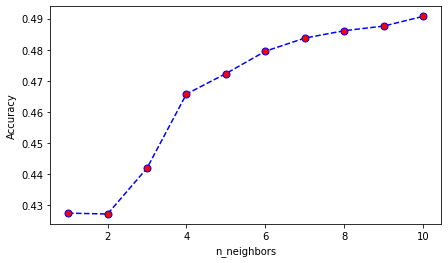

In [187]:
# Find n_neighbors for best score
accuracy = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

score_knn = max(accuracy)
print('Accuracy Score of K-Nearest Neighbors Classifier :', score_knn)

plt.figure(figsize=(7, 4))
plt.plot(range(1,11), accuracy, linestyle='dashed', marker='o', color='blue',
        markersize=7, markerfacecolor='red')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

models.append('K-Nearest Neighbors')
scores.append(score_knn)

In [188]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result.sort_values(by='Score', ascending=False, inplace=True)
df_result

,Model,Score
0,K-Nearest Neighbors,0.490765
